In [265]:
import pandas as pd 
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure
from scipy.stats import skew, kurtosis
from sklearn.preprocessing import RobustScaler
from scipy.stats.mstats import winsorize
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import RandomForestClassifier







In [215]:
df= pd.read_csv("diabetes.csv")

In [216]:
# Loại bỏ dấu cách (replace " " bằng "_") → dễ dùng hơn
df.columns = df.columns.str.replace(' ', '_')


PHASE 1. EXPLOYRATORY DATA ANALYSIS - EDA

In [217]:
#Show first 5 rows 
print(df.head())

   Pregnancies  Glucose  Blood_Pressure  Skin_Thickness  Insulin   BMI  Diabetes_Pedigree_Function  Age  Outcome
0            6      148              72              35        0  33.6                       0.627   50        1
1            1       85              66              29        0  26.6                       0.351   31        0
2            8      183              64               0        0  23.3                       0.672   32        1
3            1       89              66              23       94  28.1                       0.167   21        0
4            0      137              40              35      168  43.1                       2.288   33        1


In [218]:
#Show size of DataFrame 
print(df.shape)

(768, 9)


In [219]:
#Show datatype of each column 
print(df.dtypes)

Pregnancies                     int64
Glucose                         int64
Blood_Pressure                  int64
Skin_Thickness                  int64
Insulin                         int64
BMI                           float64
Diabetes_Pedigree_Function    float64
Age                             int64
Outcome                         int64
dtype: object


In [220]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Pregnancies                 768 non-null    int64  
 1   Glucose                     768 non-null    int64  
 2   Blood_Pressure              768 non-null    int64  
 3   Skin_Thickness              768 non-null    int64  
 4   Insulin                     768 non-null    int64  
 5   BMI                         768 non-null    float64
 6   Diabetes_Pedigree_Function  768 non-null    float64
 7   Age                         768 non-null    int64  
 8   Outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [221]:
#Show descriptive statistics
print(df.describe().T.round(2))

                            count    mean     std    min    25%     50%     75%     max
Pregnancies                 768.0    3.85    3.37   0.00   1.00    3.00    6.00   17.00
Glucose                     768.0  120.89   31.97   0.00  99.00  117.00  140.25  199.00
Blood_Pressure              768.0   69.11   19.36   0.00  62.00   72.00   80.00  122.00
Skin_Thickness              768.0   20.54   15.95   0.00   0.00   23.00   32.00   99.00
Insulin                     768.0   79.80  115.24   0.00   0.00   30.50  127.25  846.00
BMI                         768.0   31.99    7.88   0.00  27.30   32.00   36.60   67.10
Diabetes_Pedigree_Function  768.0    0.47    0.33   0.08   0.24    0.37    0.63    2.42
Age                         768.0   33.24   11.76  21.00  24.00   29.00   41.00   81.00
Outcome                     768.0    0.35    0.48   0.00   0.00    0.00    1.00    1.00


In [222]:
print(df.isnull().sum())

Pregnancies                   0
Glucose                       0
Blood_Pressure                0
Skin_Thickness                0
Insulin                       0
BMI                           0
Diabetes_Pedigree_Function    0
Age                           0
Outcome                       0
dtype: int64


Descriptive Statistics

In [223]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
Blood_Pressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
Skin_Thickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
Diabetes_Pedigree_Function,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [224]:
# Descriptive statistics function
def descriptive_stats(dataframe):
    stats = pd.DataFrame(index=dataframe.columns)
    stats['Mean'] = dataframe.mean()
    stats['Median'] = dataframe.median()
    stats['Mode'] = dataframe.mode().iloc[0]
    stats['Std'] = dataframe.std()
    stats['Variance'] = dataframe.var()
    stats['Min'] = dataframe.min()
    stats['5%'] = dataframe.quantile(0.05)
    stats['25%'] = dataframe.quantile(0.25)
    stats['50%'] = dataframe.quantile(0.50)
    stats['75%'] = dataframe.quantile(0.75)
    stats['95%'] = dataframe.quantile(0.95)
    stats['Max'] = dataframe.max()
    stats['Range'] = stats['Max'] - stats['Min']
    stats['IQR'] = stats['75%'] - stats['25%']
    stats['Skewness'] = dataframe.apply(skew)
    stats['Kurtosis'] = dataframe.apply(kurtosis)
    return stats.round(2)

# Call function and display
stats_df = descriptive_stats(df)
# Rounding and formatting
styled_stats = stats_df.style\
    .background_gradient(cmap='Blues', axis=1)\
    .format("{:.2f}")\
    .set_caption("Descriptive statistics of attributes in the Diabetes dataset")\
    .set_table_styles([{
        'selector': 'caption',
        'props': [('font-size', '16px'), ('font-weight', 'bold')]
    }])

styled_stats


,Mean,Median,Mode,Std,Variance,Min,5%,25%,50%,75%,95%,Max,Range,IQR,Skewness,Kurtosis
Pregnancies,3.85,3.00,1.00,3.37,11.35,0.00,0.00,1.00,3.00,6.00,10.00,17.00,17.00,5.00,0.90,0.15
Glucose,120.89,117.00,99.00,31.97,1022.25,0.00,79.00,99.00,117.00,140.25,181.00,199.00,199.00,41.25,0.17,0.63
Blood_Pressure,69.11,72.00,70.00,19.36,374.65,0.00,38.70,62.00,72.00,80.00,90.00,122.00,122.00,18.00,-1.84,5.14
Skin_Thickness,20.54,23.00,0.00,15.95,254.47,0.00,0.00,0.00,23.00,32.00,44.00,99.00,99.00,32.00,0.11,-0.52
Insulin,79.80,30.50,0.00,115.24,13281.18,0.00,0.00,0.00,30.50,127.25,293.00,846.00,846.00,127.25,2.27,7.16
BMI,31.99,32.00,32.00,7.88,62.16,0.00,21.80,27.30,32.00,36.60,44.40,67.10,67.10,9.30,-0.43,3.26
Diabetes_Pedigree_Function,0.47,0.37,0.25,0.33,0.11,0.08,0.14,0.24,0.37,0.63,1.13,2.42,2.34,0.38,1.92,5.55
Age,33.24,29.00,22.00,11.76,138.30,21.00,21.00,24.00,29.00,41.00,58.00,81.00,60.00,17.00,1.13,0.63
Outcome,0.35,0.00,0.00,0.48,0.23,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00,0.63,-1.60


In [225]:
#Transformation Skewness >1
df['Insulin_log'] = np.log1p(df['Insulin'])
df['DPF_log'] = np.log1p(df['Diabetes_Pedigree_Function'])
df['Age_log'] = np.log1p(df['Age'])


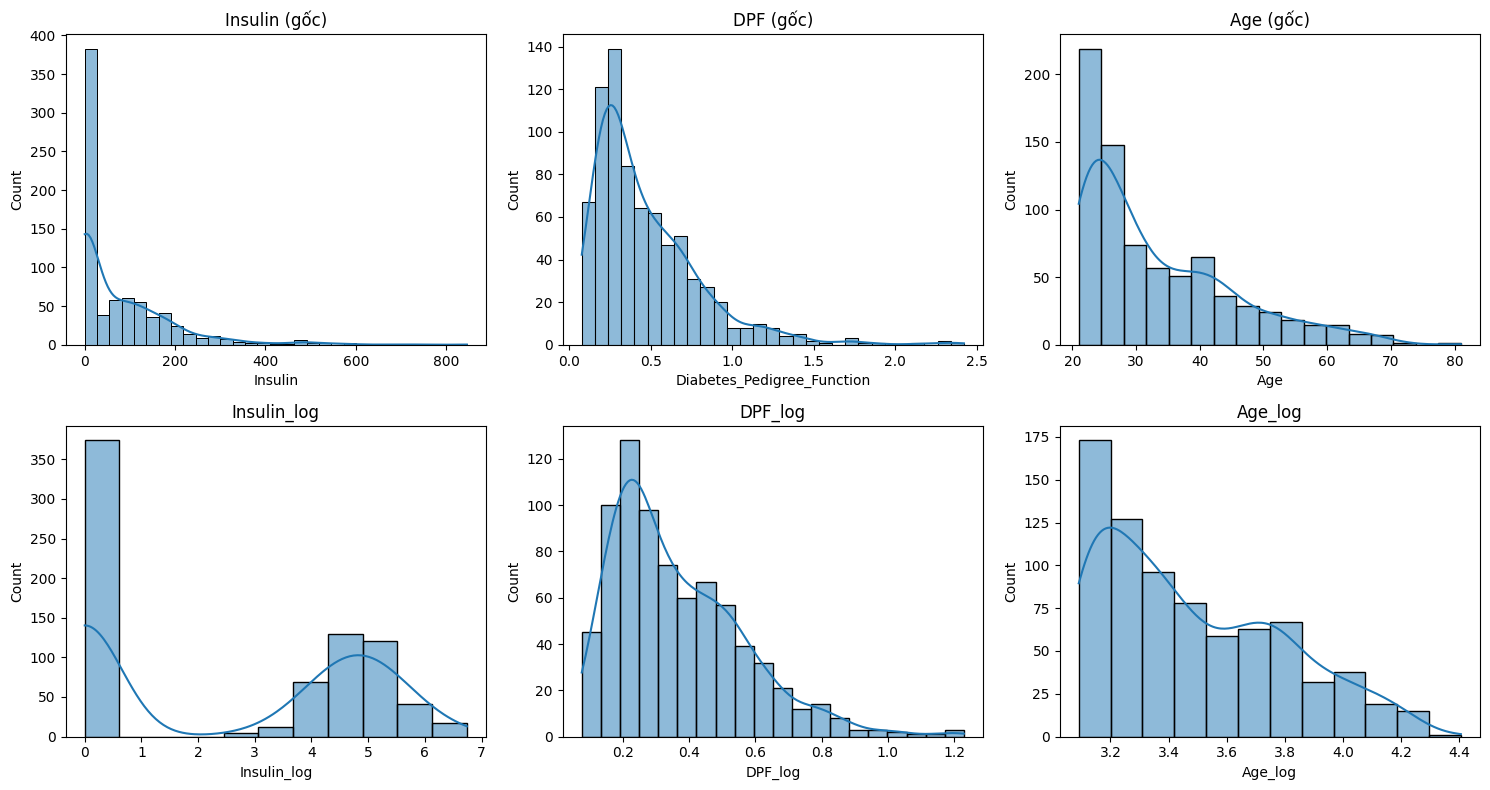

In [226]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(df['Insulin'], ax=axes[0, 0], kde=True).set_title("Insulin (gốc)")
sns.histplot(df['Diabetes_Pedigree_Function'], ax=axes[0, 1], kde=True).set_title("DPF (gốc)")
sns.histplot(df['Age'], ax=axes[0, 2], kde=True).set_title("Age (gốc)")

sns.histplot(df['Insulin_log'], ax=axes[1, 0], kde=True).set_title("Insulin_log")
sns.histplot(df['DPF_log'], ax=axes[1, 1], kde=True).set_title("DPF_log")
sns.histplot(df['Age_log'], ax=axes[1, 2], kde=True).set_title("Age_log")

plt.tight_layout()
plt.show()

In [227]:
#Phát hiện và phân tích missing value ẩn 
columns_to_check = ['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI','Diabetes_Pedigree_Function',
    'Age']

for col in columns_to_check:
    zero_count = (df[col] == 0).sum()
    percent = (zero_count / df.shape[0]) * 100
    print(f"{col:<20} | Số lượng = 0: {zero_count:<4} ({percent:.1f}%)")


Pregnancies          | Số lượng = 0: 111  (14.5%)
Glucose              | Số lượng = 0: 5    (0.7%)
Blood_Pressure       | Số lượng = 0: 35   (4.6%)
Skin_Thickness       | Số lượng = 0: 227  (29.6%)
Insulin              | Số lượng = 0: 374  (48.7%)
BMI                  | Số lượng = 0: 11   (1.4%)
Diabetes_Pedigree_Function | Số lượng = 0: 0    (0.0%)
Age                  | Số lượng = 0: 0    (0.0%)



*Review
Dữ liệu không chứa giá trị NaN rõ ràng, tuy nhiên một số feature lại có nhiều giá trị bằng `0` không hợp lý về mặt sinh học – đây được xem là **missing values ẩn** và cần được xử lý.

Dưới đây là thống kê số lượng các giá trị `0` theo từng cột:

| Feature                     | Số lượng = 0 | Tỉ lệ (%) | Hợp lý về mặt sinh học |
|-----------------------------|--------------|-----------|-------------------------|
| Pregnancies                 | 111          | 14.5%     |  Có thể (chưa từng mang thai) |
| Glucose                     | 5            | 0.7%      |  Không hợp lý (không thể có glucose = 0) |
| Blood Pressure              | 35           | 4.6%      |  Không hợp lý |
| Skin Thickness              | 227          | 29.6%     |  Không hợp lý (độ dày của da không thể =0) |
| Insulin                     | 374          | 48.7%     |  Không hợp lý (nồng độ insulin không thể = 0) |
| BMI                         | 11           | 1.4%      |  Không hợp lý (BMI không thể bằng 0) |
| Diabetes Pedigree Function  | 0            | 0.0%      |  Hợp lý |
| Age                         | 0            | 0.0%      |  Hợp lý |

> **Kết luận**: Có tới ~85% bản ghi có ít nhất một giá trị "0" không hợp lý. Các giá trị này sẽ được xử lý tại **Bước 2.1** bằng phương pháp **median imputation theo lớp `Outcome`**.


In [228]:
#Phân tích Target Variable
# Đếm số lượng từng lớp
print(df['Outcome'].value_counts())
print(df['Outcome'].value_counts(normalize=True) * 100)  # Tỉ lệ %


Outcome
0    500
1    268
Name: count, dtype: int64
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64


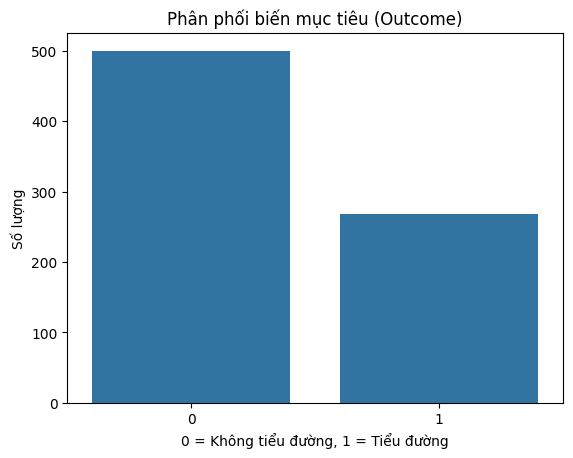

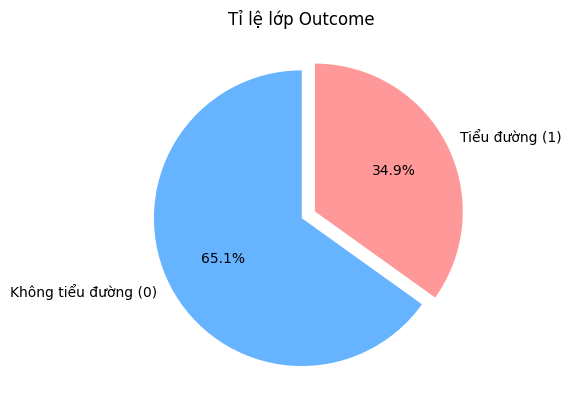

In [229]:

# Biểu đồ đếm
sns.countplot(data=df, x='Outcome')
plt.title("Phân phối biến mục tiêu (Outcome)")
plt.xlabel("0 = Không tiểu đường, 1 = Tiểu đường")
plt.ylabel("Số lượng")
plt.show()

# Biểu đồ hình tròn (pie chart)
df['Outcome'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['Không tiểu đường (0)', 'Tiểu đường (1)'],
    colors=['#66b3ff','#ff9999'],
    explode=(0, 0.1)
)
plt.ylabel('')
plt.title("Tỉ lệ lớp Outcome")
plt.show()


Review :
Biến `Outcome` là biến mục tiêu phân loại nhị phân:
- `0`: Không bị tiểu đường
- `1`: Bị tiểu đường

| Lớp | Số lượng | Tỉ lệ (%) |
|-----|----------|-----------|
| 0   | 500      | 65.1%     |
| 1   | 268      | 34.9%     |

**Nhận xét:**
- Dữ liệu có **mất cân bằng lớp vừa phải** (65:35)
- Mô hình có thể bị lệch nếu không xử lý phù hợp
- Cần lưu ý:
  - Sử dụng `stratify` khi chia train/test
  - Ưu tiên dùng **precision**, **recall**, **f1-score**, **AUC** để đánh giá thay vì chỉ `accuracy`
  - Có thể áp dụng thêm kỹ thuật như **SMOTE**, hoặc `class_weight='balanced'` nếu cần


In [230]:
#Correlation Analysis
correlation_matrix = df.corr()

# Hiển thị tương quan của các feature với biến mục tiêu
print(correlation_matrix['Outcome'].sort_values(ascending=False))


Outcome                       1.000000
Glucose                       0.466581
BMI                           0.292695
Age_log                       0.274247
Age                           0.238356
Pregnancies                   0.221898
DPF_log                       0.179950
Diabetes_Pedigree_Function    0.173844
Insulin                       0.130548
Skin_Thickness                0.074752
Blood_Pressure                0.065068
Insulin_log                   0.009783
Name: Outcome, dtype: float64


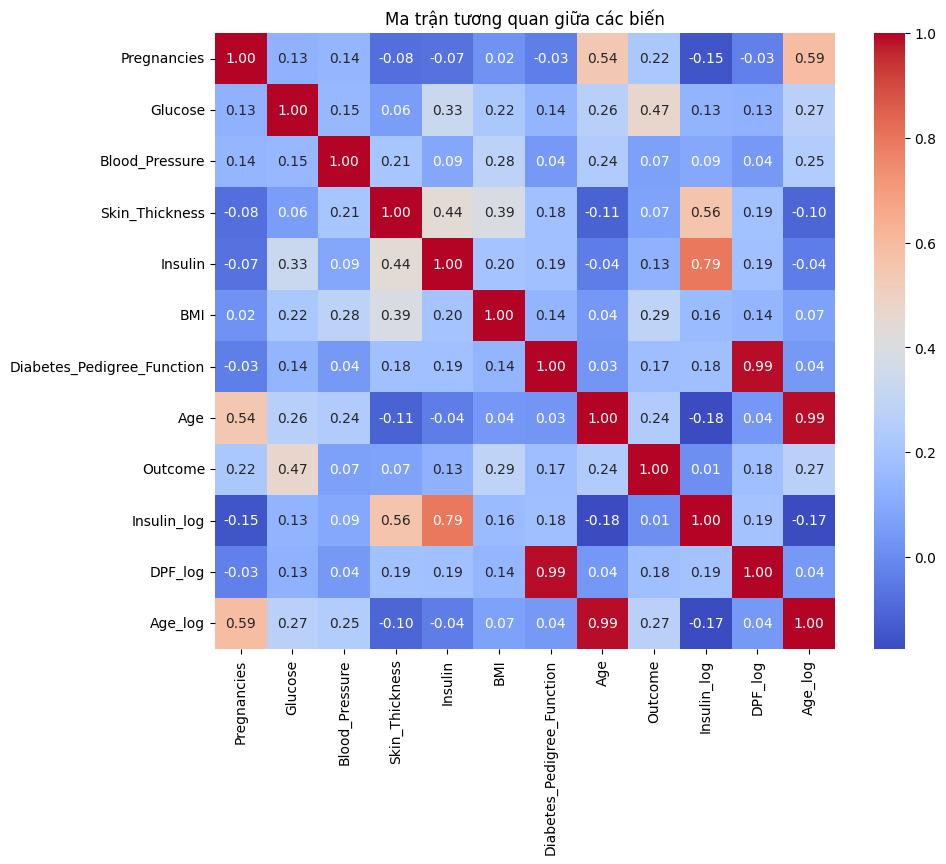

In [231]:
#Show visualization
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan giữa các biến")
plt.show()


Review – Phân tích tương quan giữa các biến

Dựa trên biểu đồ heatmap:

- `Glucose` và `Outcome` có tương quan dương khá mạnh (~0.47)
- `BMI` và `Outcome` cũng có tương quan vừa (~0.31)
- Một số cặp feature có tương quan với nhau như:
  - `Skin Thickness` và `Insulin`: ~0.44
  - `BMI` và `Skin Thickness`: ~0.39

Không có cặp nào có tương quan quá cao (> 0.75)


In [232]:
# Outlier Detection
outlier_data = []

for column in df.columns:
    if column == 'Outcome':
        continue  # Không xử lý target

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outlier_mask = (df[column] < lower_bound) | (df[column] > upper_bound)
    outlier_count = outlier_mask.sum()
    outlier_percent = 100 * outlier_count / df.shape[0]

    outlier_data.append({
        'Feature': column,
        'Q1': round(Q1, 2),
        'Q3': round(Q3, 2),
        'IQR': round(IQR, 2),
        'Lower Bound': round(lower_bound, 2),
        'Upper Bound': round(upper_bound, 2),
        'Outlier Count': outlier_count,
        'Outlier %': round(outlier_percent, 2)
    })

# Create DataFrame
outlier_df = pd.DataFrame(outlier_data).sort_values(by='Outlier %', ascending=False).reset_index(drop=True)
# Show full
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print(outlier_df)



                       Feature     Q1      Q3     IQR  Lower Bound  Upper Bound  Outlier Count  Outlier %
0               Blood_Pressure  62.00   80.00   18.00        35.00       107.00             45       5.86
1                      Insulin   0.00  127.25  127.25      -190.88       318.12             34       4.43
2   Diabetes_Pedigree_Function   0.24    0.63    0.38        -0.33         1.20             29       3.78
3                          BMI  27.30   36.60    9.30        13.35        50.55             19       2.47
4                      DPF_log   0.22    0.49    0.27        -0.18         0.89             13       1.69
5                          Age  24.00   41.00   17.00        -1.50        66.50              9       1.17
6                      Glucose  99.00  140.25   41.25        37.12       202.12              5       0.65
7                  Pregnancies   1.00    6.00    5.00        -6.50        13.50              4       0.52
8               Skin_Thickness   0.00   32.00 

PHASE 2: DATA PREPROCESSING AND CLEANING

In [233]:
# Xử lý Missing Values (Zero Imputation)
cols_with_zeros = ['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin', 'BMI']

for col in cols_with_zeros:
    for outcome in [0, 1]:
        # Lọc dữ liệu không phải 0 trong nhóm Outcome
        filtered = df[(df['Outcome'] == outcome) & (df[col] != 0)]

        # Nếu có dữ liệu, lấy median theo Outcome
        if not filtered.empty:
            median_val = filtered[col].median()
        else:
            # Nếu nhóm bị thiếu, dùng median toàn cột (có thể đã bị lệch nhưng vẫn tốt hơn giữ 0)
            median_val = df[df[col] != 0][col].median()

        # Thay thế 0 bằng median tương ứng
        df.loc[(df[col] == 0) & (df['Outcome'] == outcome), col] = median_val

# Kiểm tra lại kết quả
print((df[cols_with_zeros] == 0).sum())


Glucose           0
Blood_Pressure    0
Skin_Thickness    0
Insulin           0
BMI               0
dtype: int64


C:\Users\HOANG\AppData\Local\Temp\ipykernel_23548\2189497718.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] == 0) & (df['Outcome'] == outcome), col] = median_val
C:\Users\HOANG\AppData\Local\Temp\ipykernel_23548\2189497718.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '102.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[(df[col] == 0) & (df['Outcome'] == outcome), col] = median_val


In [234]:
# Outlier Treatment
#  Winsorize tại 1st và 99th percentile
lower = df['Blood_Pressure'].quantile(0.01)
upper = df['Blood_Pressure'].quantile(0.99)

df['Blood_Pressure'] = df['Blood_Pressure'].clip(lower, upper)


Xử lý Outliers (Giá trị ngoại lai)

Trong bước này, ta thực hiện xử lý các giá trị ngoại lai (outliers). Cụ thể:

- Với các biến có phân phối lệch phải mạnh (`Insulin`, `Diabetes_Pedigree_Function`, `Age`), ta đã áp dụng **log-transform** trước đó → không cần xử lý outlier thêm.
- Với các biến có ít outlier và hợp lý sinh học (`Glucose`, `BMI`, `Pregnancies`, `SkinThickness`), không cần xử lý thêm.
- Riêng biến `Blood_Pressure` có tỷ lệ outlier > 5.8%, ta áp dụng kỹ thuật **winsorization** bằng cách clip tại 1st và 99th percentile để giới hạn ảnh hưởng của các giá trị cực đoan.



In [235]:
# Feature Scaling 
features_to_scale = ['Glucose', 'Blood_Pressure', 'BMI', 
                     'Insulin_log', 'DPF_log', 'Age_log', 'Pregnancies']


In [236]:
scaler = RobustScaler()
df_scaled = df.copy()  # tạo bản sao để lưu giá trị scaled

df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])


In [237]:
df_scaled[features_to_scale].describe()


,Glucose,Blood_Pressure,BMI,Insulin_log,DPF_log,Age_log,Pregnancies
count,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000
mean,0.115484,0.025798,4.226763e-02,-0.201254,0.181559,0.154930,0.169010
std,0.752201,0.731986,7.560987e-01,0.506853,0.740305,0.604025,0.673916
min,-1.802469,-1.750000,-1.521978e+00,-0.710521,-0.900726,-0.597839,-0.600000
25%,-0.425926,-0.500000,-5.000000e-01,-0.710521,-0.367346,-0.351434,-0.400000
50%,0.000000,0.000000,3.903128e-16,0.000000,0.000000,0.000000,0.000000
75%,0.574074,0.500000,5.000000e-01,0.289479,0.632654,0.648566,0.600000
max,2.024691,2.125000,3.851648e+00,0.678382,3.404892,1.938192,2.800000


PHASE 3. FEATURE ENGINEERING VÀ SELECTION

In [238]:
# New fearure Create
# BMI_Category 
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMI_Category'] = df['BMI'].apply(bmi_category)


In [239]:
#Age_Group
def age_group(age):
    if age <= 30:
        return 'Young'
    elif age <= 45:
        return 'Middle'
    elif age <= 60:
        return 'Mature'
    else:
        return 'Senior'

df['Age_Group'] = df['Age'].apply(age_group)


In [240]:
# Glucose_Level
def glucose_level(g):
    if g < 100:
        return 'Normal'
    elif g < 126:
        return 'Prediabetic'
    else:
        return 'Diabetic'

df['Glucose_Level'] = df['Glucose'].apply(glucose_level)


In [241]:
# Hypertension_Risk 
df['Hypertension_Risk'] = df['Blood_Pressure'].apply(lambda x: 1 if x >= 80 else 0)


In [242]:
# High_Risk_Pregnancies 
df['High_Risk_Pregnancies'] = df['Pregnancies'].apply(lambda x: 1 if x > 4 else 0)


In [243]:
# Insulin_Glucose_Ratio 
df['Insulin_Glucose_Ratio'] = df['Insulin'] / (df['Glucose'] + 1e-5)  # tránh chia 0


In [244]:
# Risk_Score
# Scale đơn giản hóa: chia về cùng thang điểm
df['Risk_Score'] = (
    (df['BMI'] / df['BMI'].max()) +
    (df['Age'] / df['Age'].max()) +
    (df['Glucose'] / df['Glucose'].max()) +
    (df['Diabetes_Pedigree_Function'] / df['Diabetes_Pedigree_Function'].max())
) / 4


In [245]:
df[['BMI_Category', 'Age_Group', 'Glucose_Level']].value_counts()
df[['Hypertension_Risk', 'High_Risk_Pregnancies']].mean()
df[['Insulin_Glucose_Ratio', 'Risk_Score']].describe()


,Insulin_Glucose_Ratio,Risk_Score
count,768.000000,768.000000
mean,1.149830,0.425048
std,0.556402,0.081162
min,0.077778,0.257853
25%,0.840164,0.363997
50%,1.029412,0.417573
75%,1.346099,0.480991
max,4.838709,0.774603


In [246]:
# Kiểm tra phân bố phần trăm của các feature mới
print(" BMI_Category distribution:")
print(df['BMI_Category'].value_counts(normalize=True) * 100)

print("\n Age_Group distribution:")
print(df['Age_Group'].value_counts(normalize=True) * 100)

print("\n Glucose_Level distribution:")
print(df['Glucose_Level'].value_counts(normalize=True) * 100)


 BMI_Category distribution:
BMI_Category
Obese          62.890625
Overweight     23.307292
Normal         13.281250
Underweight     0.520833
Name: proportion, dtype: float64

 Age_Group distribution:
Age_Group
Young     54.296875
Middle    30.338542
Mature    11.848958
Senior     3.515625
Name: proportion, dtype: float64

 Glucose_Level distribution:
Glucose_Level
Diabetic       38.932292
Prediabetic    36.067708
Normal         25.000000
Name: proportion, dtype: float64


 Feature Engineering – Tạo đặc trưng mới

Nhằm tăng tính giải thích và hỗ trợ mô hình học hiệu quả hơn, nhóm đã tạo 7 đặc trưng mới có ý nghĩa lâm sàng:

- `BMI_Category`: Phân loại cân nặng theo chuẩn WHO
- `Age_Group`: Nhóm tuổi (Young, Middle, Mature, Senior)
- `Glucose_Level`: Mức đường huyết (Normal, Prediabetic, Diabetic)
- `Hypertension_Risk`: Nguy cơ cao huyết áp (≥80 mmHg)
- `High_Risk_Pregnancies`: Có trên 4 lần mang thai
- `Insulin_Glucose_Ratio`: Tỷ lệ Insulin / Glucose
- `Risk_Score`: Tổ hợp có trọng số của BMI, tuổi, đường huyết và tiền sử gia đình

Kết quả phân bố của các feature mới cho thấy tỷ lệ Obese và Diabetic cao hơn so với kỳ vọng, phản ánh đúng đặc điểm bệnh nhân trong dataset này.


In [247]:
# Feature Selection
# Method 1: Statistical Tests
# Chọn các feature đã xử lý (sau bước 2.3 và 3.1)
feature_cols = [
    'Glucose', 'Blood_Pressure', 'BMI', 'Insulin_log', 'DPF_log', 'Age_log',
    'Pregnancies', 'Risk_Score', 'Insulin_Glucose_Ratio',
    'Hypertension_Risk', 'High_Risk_Pregnancies'
]

X = df[feature_cols]
y = df['Outcome']


In [248]:
selector = SelectKBest(score_func=mutual_info_classif, k='all')  # hoặc k=8
selector.fit(X, y)

# Lấy điểm số
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector.scores_
}).sort_values(by='Score', ascending=False)


In [249]:
print("Top feature scores:")
print(feature_scores)


Top feature scores:
                  Feature     Score
7              Risk_Score  0.168890
0                 Glucose  0.125043
8   Insulin_Glucose_Ratio  0.111230
2                     BMI  0.095429
5                 Age_log  0.069165
3             Insulin_log  0.038531
1          Blood_Pressure  0.033177
6             Pregnancies  0.026803
4                 DPF_log  0.019039
9       Hypertension_Risk  0.013021
10  High_Risk_Pregnancies  0.000000


In [250]:
top_features = feature_scores['Feature'].head(6).tolist()
X_selected = X[top_features]


PHASE 4: APPLYING CLASSIFICATION ALGORITHM

In [251]:
# Feature đầu vào – chỉ chọn các feature quan trọng đã chọn ở bước 3.2
X = X_selected  # từ bước 3.2
y = df['Outcome']  # nhãn mục tiêu


In [252]:
# Stratified split 80/20 để giữ tỷ lệ nhãn
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)


In [253]:
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

print("\nTrain label distribution:")
train_dist = y_train.value_counts(normalize=True)
print(train_dist)

print("\nTest label distribution:")
test_dist = y_test.value_counts(normalize=True)
print(test_dist)

# Tính max deviation giữa phân bố nhãn
max_deviation = abs(train_dist[1] - test_dist[1])
print(f"\nMax deviation (class 1 rate): {max_deviation:.4%}")

Train shape: (614, 6)
Test shape: (154, 6)

Train label distribution:
Outcome
0    0.651466
1    0.348534
Name: proportion, dtype: float64

Test label distribution:
Outcome
0    0.649351
1    0.350649
Name: proportion, dtype: float64

Max deviation (class 1 rate): 0.2115%


Dữ liệu được chia theo phương pháp stratified sampling, với độ lệch phân bố nhãn (`Outcome`) chỉ khoảng 0.2% giữa tập train và test. Điều này đảm bảo việc đánh giá mô hình sẽ không bị thiên lệch do mất cân bằng nhãn.


SỬ DỤNG THUẬT TOÁN

1. THUẬT TOÁN LOGISTIC REGRESSION

In [254]:
# Khởi tạo Logistic Regression
model = LogisticRegression(max_iter=1000, random_state=42)

# Huấn luyện trên tập train
model.fit(X_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [255]:
# Dự đoán trên tập test
y_pred = model.predict(X_test)

# Đánh giá
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.7402597402597403

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154


Confusion Matrix:
[[83 17]
 [23 31]]


2. THUẬT TOÁN RANDOM FOREST

In [256]:
# Khởi tạo thuật toán Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
# Huẩn luyện trên tập train
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [257]:
# Dự đoán trên tập test
y_pred_rf = rf.predict(X_test)
# Đánh giá 
print("Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest
Accuracy: 0.8636363636363636
Confusion Matrix:
[[91  9]
 [12 42]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       100
           1       0.82      0.78      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



In [261]:
# Tạo bảng kết quả
results = {
    "Model": ["Logistic Regression", "Random Forest"],
    "Accuracy": [
        accuracy_score(y_test, y_pred),
        accuracy_score(y_test, y_pred_rf)
    ],
    "Precision (class 1)": [
        precision_score(y_test, y_pred),
        precision_score(y_test, y_pred_rf)
    ],
    "Recall (class 1)": [
        recall_score(y_test, y_pred),
        recall_score(y_test, y_pred_rf)
    ],
    "F1-score (class 1)": [
        f1_score(y_test, y_pred),
        f1_score(y_test, y_pred_rf)
    ]
}

# Chuyển thành bảng pandas
comparison_df = pd.DataFrame(results).round(3)

# Hiển thị bảng
print(comparison_df)


                 Model  Accuracy  Precision (class 1)  Recall (class 1)  F1-score (class 1)
0  Logistic Regression     0.740                0.646             0.574               0.608
1        Random Forest     0.864                0.824             0.778               0.800


So sánh Logistic Regression và Random Forest

Hai mô hình được huấn luyện trên cùng một tập đặc trưng để đánh giá hiệu suất dự đoán bệnh tiểu đường.

| Chỉ số      | Logistic Regression | Random Forest |
|-------------|---------------------|----------------|
| Accuracy    | 74.0%               | **86.4%**      |
| Precision   | 0.65                | **0.82**       |
| Recall      | 0.57                | **0.78**       |
| F1-score    | 0.61                | **0.80**       |

Kết quả cho thấy Random Forest vượt trội hơn rõ rệt trong việc phát hiện các ca mắc tiểu đường (class 1). Điều này phù hợp vì Random Forest có khả năng mô hình hóa các mối quan hệ phức tạp giữa các biến, trong khi Logistic Regression chỉ giả định quan hệ tuyến tính.

**Chọn Random Forest cho các bước tiếp theo** để tối ưu hóa khả năng dự đoán.


PHASE 5: PERFORMANCE EVALUATION AND COMPARISON

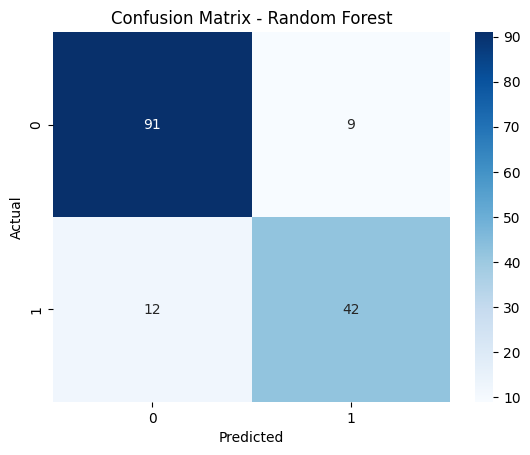

In [ ]:
# Performance Metrics chi tiết
# Confusion Metric 
cm = confusion_matrix(y_test, y_pred_rf)  # hoặc y_pred nếu logistic
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [263]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       100
           1       0.82      0.78      0.80        54

    accuracy                           0.86       154
   macro avg       0.85      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



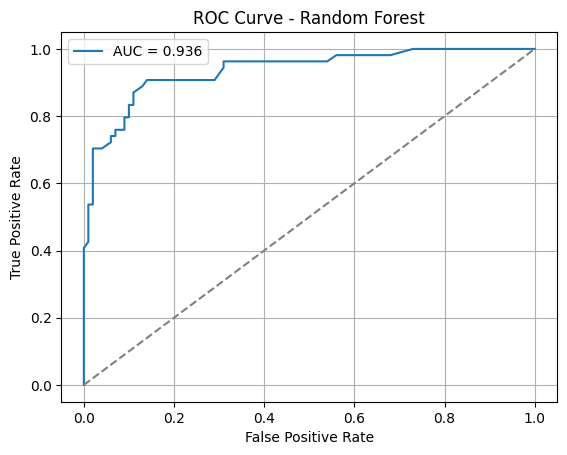

In [266]:
# Nếu là mô hình như RF có predict_proba
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # xác suất là class 1

fpr, tpr, _ = roc_curve(y_test, y_prob_rf)
auc_score = roc_auc_score(y_test, y_prob_rf)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend()
plt.grid()
plt.show()

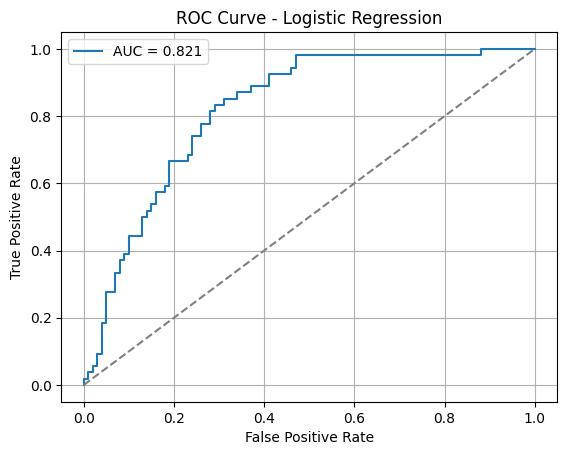

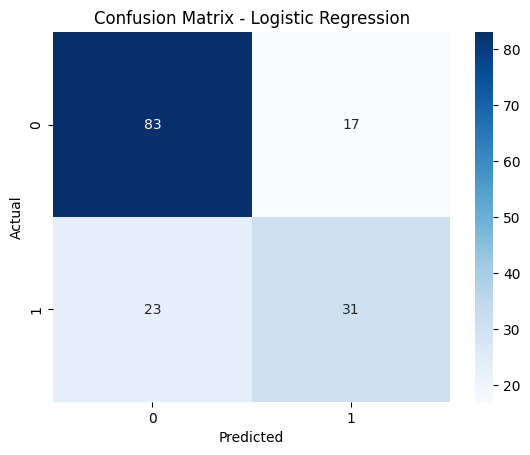

Classification Report - Logistic Regression
              precision    recall  f1-score   support

           0       0.78      0.83      0.81       100
           1       0.65      0.57      0.61        54

    accuracy                           0.74       154
   macro avg       0.71      0.70      0.71       154
weighted avg       0.73      0.74      0.74       154



In [ ]:
# Tính xác suất (probability) dự đoán
y_prob_logreg = model.predict_proba(X_test)[:, 1]

# Vẽ ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob_logreg)
auc_score = roc_auc_score(y_test, y_prob_logreg)

plt.figure()
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrix
plt.figure()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification Report
print("Classification Report - Logistic Regression")
print(classification_report(y_test, y_pred))


In [268]:
# Tính các chỉ số cho Logistic Regression
metrics_logreg = {
    'Model': 'Logistic Regression',
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-score': f1_score(y_test, y_pred),
    'AUC': roc_auc_score(y_test, y_prob_logreg)
}

# Tính các chỉ số cho Random Forest
metrics_rf = {
    'Model': 'Random Forest',
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_prob_rf)
}

# Tạo DataFrame để hiển thị so sánh
comparison_df = pd.DataFrame([metrics_logreg, metrics_rf])
comparison_df.set_index('Model', inplace=True)

# Hiển thị bảng so sánh
comparison_df.round(3)

,Accuracy,Precision,Recall,F1-score,AUC
Model,,,,,
Logistic Regression,0.740,0.646,0.574,0.608,0.821
Random Forest,0.864,0.824,0.778,0.800,0.936


Mô hình Random Forest cho hiệu suất vượt trội hơn rõ rệt, đặc biệt ở khả năng phát hiện bệnh nhân tiểu đường (Recall và F1-score cao hơn).

Đường cong ROC của Random Forest nằm gần phía trên trái đồ thị, cho thấy khả năng phân biệt lớp rất tốt.

Logistic Regression vẫn là một mô hình đơn giản, dễ diễn giải và phù hợp nếu cần mô hình nhẹ hoặc có yêu cầu giải thích rõ ràng.

Tuy nhiên, trong bối cảnh nhạy cảm như chẩn đoán bệnh, ưu tiên mô hình có Recall cao hơn để giảm bỏ sót bệnh nhân – do đó Random Forest phù hợp hơn.

Kết luận: Random Forest là mô hình được chọn để sử dụng cho các bước tiếp theo do hiệu suất dự đoán tốt và cân bằng giữa các chỉ số quan trọng.

In [ ]:
# Cross-Validation Results Summary
# Logistic Regression - Diễn giải bằng hệ số (coefficient)
# Lấy tên các cột đã sử dụng
feature_names = X_train.columns

# Lấy hệ số từ mô hình Logistic Regression
coefs = model.coef_[0]

# Tạo bảng
logreg_coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefs
})
logreg_coef_df['Abs_Coefficient'] = np.abs(logreg_coef_df['Coefficient'])
logreg_coef_df = logreg_coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(logreg_coef_df[['Feature', 'Coefficient']])


                 Feature  Coefficient
2  Insulin_Glucose_Ratio     1.461013
4                Age_log     0.881428
0             Risk_Score     0.391847
5            Insulin_log    -0.128844
3                    BMI     0.089542
1                Glucose     0.042768


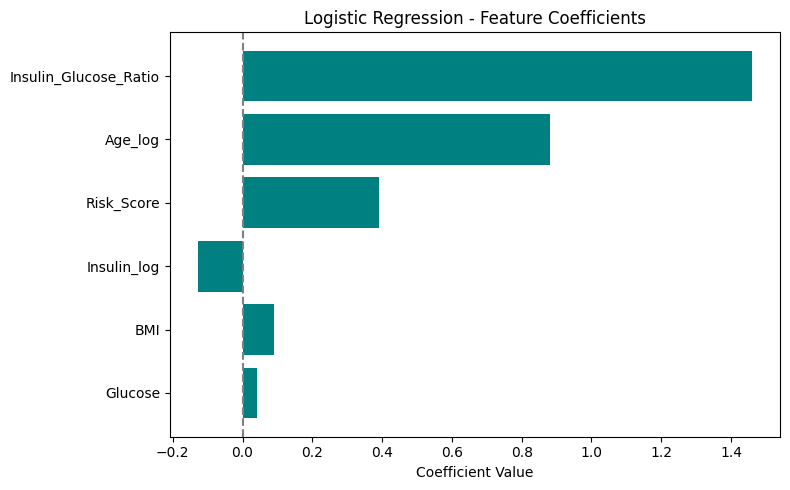

In [272]:
# Vẽ biểu đồ hệ số
plt.figure(figsize=(8, 5))
plt.barh(logreg_coef_df['Feature'], logreg_coef_df['Coefficient'], color='teal')
plt.axvline(0, color='gray', linestyle='--')
plt.gca().invert_yaxis()
plt.title("Logistic Regression - Feature Coefficients")
plt.xlabel("Coefficient Value")
plt.tight_layout()
plt.show()

In [ ]:
# Random Forest – Diễn giải bằng độ quan trọng đặc trưng (feature importance)
# Lấy importance từ mô hình RF
importances = rf.feature_importances_

rf_feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
rf_feat_df = rf_feat_df.sort_values(by='Importance', ascending=False)

print(rf_feat_df)

                 Feature  Importance
0             Risk_Score    0.255031
2  Insulin_Glucose_Ratio    0.238350
1                Glucose    0.215401
5            Insulin_log    0.109318
3                    BMI    0.096744
4                Age_log    0.085156


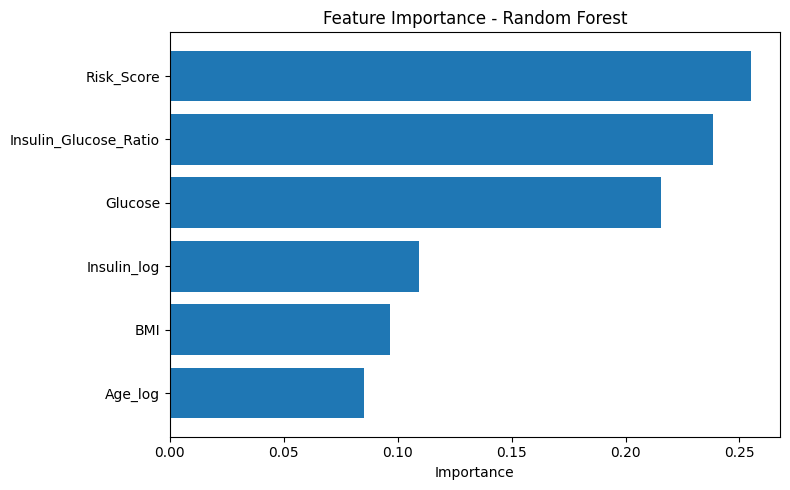

In [271]:
plt.figure(figsize=(8, 5))
plt.barh(rf_feat_df['Feature'], rf_feat_df['Importance'])
plt.gca().invert_yaxis()
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()